In [1]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv("churn-5000.csv")

In [2]:
num_df = df.select_dtypes(include=['float64', 'int64']).copy()
cat_df = df.select_dtypes(include=['object']).copy()

# Categorical boolean mask
categorical_feature_mask = cat_df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = cat_df.columns[categorical_feature_mask].tolist()

import numpy as np
#conData=np.log(0.00001 + 1)
conData=0
cat_df=cat_df.fillna(conData)
num_df=num_df.fillna(conData)
cat_df=cat_df.astype(str)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_df[categorical_cols] = cat_df[categorical_cols].apply(lambda col: le.fit_transform(col))

#cat_df[categorical_cols].head(10)


churn=cat_df['churn']
cat_df=cat_df.drop(['churn'], axis=1)


num_df=num_df.fillna(conData)

result_df = pd.concat([num_df, cat_df], axis=1)
np.nan_to_num(result_df)

result_df_op=result_df

X=result_df_op
y=churn

from sklearn.model_selection import train_test_split  
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train=X
X_test=X
y_train=y
y_test=y

In [4]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int32

In [5]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
classifier = GaussianNB()

classifier.fit(X_train,y_train)

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

from sklearn.model_selection import cross_val_score
roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
print('roc_auc: ',roc_auc.mean())

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
auc = auc(fpr, tpr)
print('auc: ',auc)

3993 300 417 290
pod:  0.4101838755304102
pof:  0.06988120195667366
AUC:  0.6701513367868682
roc_auc:  0.8449840540505461
auc:  0.6701513367868682


In [6]:
# KNN
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)


#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

4184 109 525 182
pod:  0.25742574257425743
pof:  0.025390170044258094
AUC:  0.6160177862649997


In [7]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)
classifier.fit(X_train, y_train) 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

4291 2 697 10
pod:  0.014144271570014143
pof:  0.0004658746797111577
AUC:  0.5068391984451515


auc:  0.5068391984451516


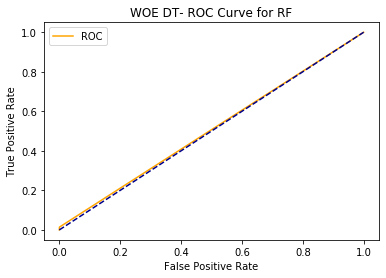

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
auc = auc(fpr, tpr)
print('auc: ',auc)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('WOE DT- ROC Curve for RF')
plt.legend()
plt.show()

In [9]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
classifier = LogisticRegression()
classifier.fit(X_train, y_train) 

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)   

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4215 78 601 106
pod:  0.14992927864214992
pof:  0.01816911250873515
AUC:  0.5658800830667075


In [13]:
#SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

4293 0 707 0
pod:  0.0
pof:  0.0
AUC:  0.5


Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 3599 samples, validate on 900 samples
Epoch 1/30
3599/3599 [==============================] - 1s 297us/step - loss: 2.2796 - acc: 0.8586 - val_loss: 2.2744 - val_acc: 0.8589
Epoch 2/30
3599/3599 [==============================] - 0s 130us/step - loss: 2.2796 - acc: 0.8586 - val_loss: 2.2744 - val_acc: 0.8589
Epoch 3/30
3599/3599 [==============================] - 0s 135us/step - loss: 2.2796 - acc: 0.8586 - val_loss: 2.2744 - val_acc: 0.8589
Epoch 4/30
3599/3599 [==============================] - 0s 135us/step - loss: 2.2796 - acc: 0.8586 - val_loss: 2.2744 - val_acc: 0.8589
y2_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]

 [0.]]
pod 1st:  0.0
Train on 3600 samples, validate on 900 samples
Epoch 1/30
3600/3600 [==============================] - 1s 356us/step - loss: 2.2869 - acc: 0.8581 - val_loss: 2.2744 - val_acc: 0.8589
Epoch 2/30
3600/3600 [==============================] - 0s 100us/step - loss: 2.2789 - acc: 0.8586 - val_loss: 2.2744 - val_acc: 0.8589
Epoch 3/30
3600/3600 [==============================] - 0s 91us/step - loss: 2.2789 - acc: 0.8586 - val_loss: 2.2744 - val_acc: 0.8589
Epoch 4/30
3600/3600 [==============================] - 0s 91us/step - loss: 2.2789 - acc: 0.8586 - val_loss: 2.2744 - val_acc: 0.8589
y2_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [

y22_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]

Train on 3600 samples, validate on 900 samples
Epoch 1/30
3600/3600 [==============================] - 1s 304us/step - loss: 13.6614 - acc: 0.1428 - val_loss: 13.6927 - val_acc: 0.1411
Epoch 2/30
3600/3600 [==============================] - 0s 104us/step - loss: 13.6883 - acc: 0.1414 - val_loss: 13.6927 - val_acc: 0.1411
Epoch 3/30
3600/3600 [==============================] - 0s 100us/step - loss: 13.6883 - acc: 0.1414 - val_loss: 13.6927 - val_acc: 0.1411
Epoch 4/30
3600/3600 [==============================] - 0s 100us/step - loss: 13.6883 - acc: 0.1414 - val_loss: 13.6927 - val_acc: 0.1411
y2_pred:  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 

Train on 3600 samples, validate on 901 samples
Epoch 1/30
3600/3600 [==============================] - 1s 386us/step - loss: 2.3908 - acc: 0.8514 - val_loss: 2.1825 - val_acc: 0.8646
Epoch 2/30
3600/3600 [==============================] - 0s 109us/step - loss: 2.3058 - acc: 0.8569 - val_loss: 2.1825 - val_acc: 0.8646
Epoch 3/30
3600/3600 [==============================] - 0s 109us/step - loss: 2.3058 - acc: 0.8569 - val_loss: 2.1825 - val_acc: 0.8646
Epoch 4/30
3600/3600 [==============================] - 0s 104us/step - loss: 2.3058 - acc: 0.8569 - val_loss: 2.1825 - val_acc: 0.8646
y2_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0

In [3]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train) 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

4057 236 207 500
pod:  0.7072135785007072
pof:  0.05497321220591661
AUC:  0.8261201831473953


In [4]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train) 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

4245 48 224 483
pod:  0.6831683168316832
pof:  0.011180992313067784
AUC:  0.8359936622593078
accuracy:  0.9456


In [5]:
#FNN
def get_FNN_Predict(X2_train, X2_test, y2_train, y2_test):
    from keras.models import Sequential
    from keras.layers import Dense
    #create model
    model = Sequential()
    #get number of columns in training data
    n_cols = X2_train.shape[1]
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model using mse as a measure of model performance
    #model.compile(optimizer='adam', loss='mean_squared_error')
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
    from keras.callbacks import EarlyStopping
    #set early stopping monitor so the model stops training when it won't improve anymore
    early_stopping_monitor = EarlyStopping(patience=3)
    #train model
    model.fit(X2_train, y2_train, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])
    y2_pred = model.predict(X2_test)
    print('y2_pred: ',y2_pred)
    y22_pred=y2_pred.round()
    print('y22_pred: ',y22_pred)
    return y22_pred

pod_list = []
pof_list = []
auc_val_list = []
tn_list= []
fp_list= []
fn_list= []
tp_list= []
    
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
for train_index, test_index in folds.split(X_train,y_train):
    X2_train, X2_test, y2_train, y2_test=X_train.iloc[train_index], X_train.iloc[test_index],y_train.iloc[train_index], y_train.iloc[test_index]
    y_pred = get_FNN_Predict(X2_train, X2_test, y2_train, y2_test)
    tn, fp, fn, tp  = confusion_matrix(y2_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    pod=tp/(tp+fn)
    print('pod 1st: ',pod)
    pof=fp/(fp+tn)
    auc_val=(1+pod-pof)/2
    #break
    pod_list.append(pod)
    pof_list.append(pof)
    auc_val_list.append(auc_val)

print('pod: ',pod_list)
print ('pof: ',pof_list)
print ('auc: ',auc_val_list)

tn=sum(tn_list)
fp=sum(fp_list) 
fn=sum(fn_list) 
tp=sum(tp_list)
print(tn, fp, fn, tp)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 3599 samples, validate on 900 samples
Epoch 1/30
3599/3599 [==============================] - 1s 142us/step - loss: 3.0275 - acc: 0.8105 - val_loss: 2.2744 - val_acc: 0.8589
Epoch 2/30
3599/3599 [==============================] - 0s 53us/step - loss: 2.2796 - acc: 0.8586 - val_loss: 2.2744 - val_acc: 0.8589
Epoch 3/30
3599/3599 [==============================] - 0s 54us/step - loss: 2.2796 - acc: 0.8586 - val_loss: 2.2744 - val_acc: 0.8589
Epoch 4/30
3599/3599 [==============================] - 0s 60us/step - loss: 2.2796 - acc: 0.8586 - val_loss: 2.2744 - val_acc: 0.8589
y2_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]


 [0.]]
y22_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

Train on 3600 samples, validate on 900 samples
Epoch 1/30
3600/3600 [==============================] - 1s 198us/step - loss: 2.3642 - acc: 0.8531 - val_loss: 2.2744 - val_acc: 0.8589
Epoch 2/30
3600/3600 [==============================] - 0s 54us/step - loss: 2.2789 - acc: 0.8586 - val_loss: 2.2744 - val_acc: 0.8589
Epoch 3/30
3600/3600 [==============================] - 0s 61us/step - loss: 2.2789 - acc: 0.8586 - val_loss: 2.2744 - val_acc: 0.8589
Epoch 4/30
3600/3600 [==============================] - 0s 62us/step - loss: 2.2789 - acc: 0.8586 - val_loss: 2.2744 - val_acc: 0.8589
y2_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]


pod 1st:  0.0
Train on 3600 samples, validate on 900 samples
Epoch 1/30
3600/3600 [==============================] - 1s 240us/step - loss: 13.6883 - acc: 0.1414 - val_loss: 13.6927 - val_acc: 0.1411
Epoch 2/30
3600/3600 [==============================] - 0s 59us/step - loss: 13.6883 - acc: 0.1414 - val_loss: 13.6927 - val_acc: 0.1411
Epoch 3/30
3600/3600 [==============================] - 0s 58us/step - loss: 13.6883 - acc: 0.1414 - val_loss: 13.6927 - val_acc: 0.1411
Epoch 4/30
3600/3600 [==============================] - 0s 58us/step - loss: 13.6883 - acc: 0.1414 - val_loss: 13.6927 - val_acc: 0.1411
y2_pred:  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [

Train on 3600 samples, validate on 901 samples
Epoch 1/30
3600/3600 [==============================] - 1s 277us/step - loss: 2.2834 - acc: 0.8583 - val_loss: 2.2719 - val_acc: 0.8590
Epoch 2/30
3600/3600 [==============================] - 0s 70us/step - loss: 2.2834 - acc: 0.8583 - val_loss: 2.2719 - val_acc: 0.8590
Epoch 3/30
3600/3600 [==============================] - 0s 85us/step - loss: 2.2834 - acc: 0.8583 - val_loss: 2.2719 - val_acc: 0.8590
Epoch 4/30
3600/3600 [==============================] - 0s 103us/step - loss: 2.2834 - acc: 0.8583 - val_loss: 2.2719 - val_acc: 0.8590
y2_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]

Train on 3600 samples, validate on 901 samples
Epoch 1/30
3600/3600 [==============================] - 1s 343us/step - loss: 2.3058 - acc: 0.8569 - val_loss: 2.1825 - val_acc: 0.8646
Epoch 2/30
3600/3600 [==============================] - 0s 78us/step - loss: 2.3058 - acc: 0.8569 - val_loss: 2.1825 - val_acc: 0.8646
Epoch 3/30
3600/3600 [==============================] - 0s 75us/step - loss: 2.3058 - acc: 0.8569 - val_loss: 2.1825 - val_acc: 0.8646
Epoch 4/30
3600/3600 [==============================] - 0s 75us/step - loss: 2.3058 - acc: 0.8569 - val_loss: 2.1825 - val_acc: 0.8646
y2_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]


In [7]:
#RNN
def get_RNN_Predict(X2_train, X2_test, y2_train, y2_test):
    import pandas as pd
    from keras.models import Sequential
    from keras.layers import Dense,Dropout, LSTM, GRU
    from keras.layers import Embedding
    max_features = 10000 # number of words to consider as features
    import numpy as np
    #create model 
    model = Sequential()
    model.add(Embedding(max_features, 32))
    model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X2_train, y2_train, epochs=5, batch_size=128, validation_split=0.2)
    y2_pred = model.predict(X2_test)
    y22_pred=y2_pred.round()
    print('y22_pred: ',y22_pred)
    return y22_pred

pod_list = []
pof_list = []
auc_val_list = []
tn_list= []
fp_list= []
fn_list= []
tp_list= []
    
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
for train_index, test_index in folds.split(X_train,y_train):
    X2_train, X2_test, y2_train, y2_test=X_train.iloc[train_index], X_train.iloc[test_index],y_train.iloc[train_index], y_train.iloc[test_index]
    y_pred = get_RNN_Predict(X2_train, X2_test, y2_train, y2_test)
    tn, fp, fn, tp  = confusion_matrix(y2_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    
    pod=tp/(tp+fn)
    print('pod 1st: ',pod)
    pof=fp/(fp+tn)
    auc_val=(1+pod-pof)/2
    #break
    pod_list.append(pod)
    pof_list.append(pof)
    auc_val_list.append(auc_val)

print('pod: ',pod_list)
print ('pof: ',pof_list)
print ('auc: ',auc_val_list)

tn=sum(tn_list)
fp=sum(fp_list) 
fn=sum(fn_list) 
tp=sum(tp_list)
print(tn, fp, fn, tp)

Train on 3599 samples, validate on 900 samples
Epoch 1/5
3599/3599 [==============================] - 2s 562us/step - loss: 0.4908 - acc: 0.8586 - val_loss: 0.4041 - val_acc: 0.8589
Epoch 2/5
3599/3599 [==============================] - 0s 98us/step - loss: 0.3852 - acc: 0.8586 - val_loss: 0.4756 - val_acc: 0.8589
Epoch 3/5
3599/3599 [==============================] - 0s 106us/step - loss: 0.3437 - acc: 0.8586 - val_loss: 0.4143 - val_acc: 0.8589
Epoch 4/5
3599/3599 [==============================] - 0s 102us/step - loss: 0.2776 - acc: 0.8588 - val_loss: 0.4195 - val_acc: 0.8589
Epoch 5/5
3599/3599 [==============================] - 0s 98us/step - loss: 0.2200 - acc: 0.8680 - val_loss: 0.4915 - val_acc: 0.8511
y22_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]

3599/3599 [==============================] - 0s 98us/step - loss: 0.2291 - acc: 0.8775 - val_loss: 0.5059 - val_acc: 0.8467
y22_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 

Train on 3600 samples, validate on 900 samples
Epoch 1/5
3600/3600 [==============================] - 3s 759us/step - loss: 0.4896 - acc: 0.8517 - val_loss: 0.4044 - val_acc: 0.8589
Epoch 2/5
3600/3600 [==============================] - 0s 102us/step - loss: 0.3942 - acc: 0.8586 - val_loss: 0.4060 - val_acc: 0.8589
Epoch 3/5
3600/3600 [==============================] - 0s 102us/step - loss: 0.3575 - acc: 0.8586 - val_loss: 0.4123 - val_acc: 0.8589
Epoch 4/5
3600/3600 [==============================] - 0s 109us/step - loss: 0.2927 - acc: 0.8586 - val_loss: 0.4360 - val_acc: 0.8589
Epoch 5/5
3600/3600 [==============================] - 0s 102us/step - loss: 0.2357 - acc: 0.8628 - val_loss: 0.5576 - val_acc: 0.8589
y22_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0

y22_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]

In [12]:
#CNN - 1D CNN
def get_CNN_Predict(X2_train, X2_test, y2_train, y2_test):
    from keras.models import Sequential
    from keras import layers
    from keras.optimizers import RMSprop
    max_features = 10000 # number of words to consider as features
    
    model = Sequential()
    #model.add(layers.Embedding(max_features, 128, input_length=96))
    model.add(layers.Embedding(max_features, 128, input_length=19))
    model.add(layers.Conv1D(32, 2, activation='relu'))
    model.add(layers.MaxPooling1D(5))
    model.add(layers.Conv1D(32, 2, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(1))
    model.summary()
    model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X2_train, y2_train, epochs=5, batch_size=128, validation_split=0.2)
    y2_pred = model.predict(X2_test)
    y22_pred=y2_pred.round()
    y22_pred[y22_pred ==2.0]=1
   # y22_pred=y22_pred[y22_pred > 1.0]=1
    print('y22_pred: ',y22_pred)
    return y22_pred

pod_list = []
pof_list = []
auc_val_list = []
tn_list= []
fp_list= []
fn_list= []
tp_list= []
    
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
for train_index, test_index in folds.split(X_train,y_train):
    X2_train, X2_test, y2_train, y2_test=X_train.iloc[train_index], X_train.iloc[test_index],y_train.iloc[train_index], y_train.iloc[test_index]
    y_pred = get_CNN_Predict(X2_train, X2_test, y2_train, y2_test)
    tn, fp, fn, tp  = confusion_matrix(y2_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    pod=tp/(tp+fn)
    print('pod 1st: ',pod)
    pof=fp/(fp+tn)
    auc_val=(1+pod-pof)/2
    #break
    pod_list.append(pod)
    pof_list.append(pof)
    auc_val_list.append(auc_val)

print('pod: ',pod_list)
print ('pof: ',pof_list)
print ('auc: ',auc_val_list)

print ('tn mean: ',sum(tn_list) / len(tn_list))
print ('fp mean: ',sum(fp_list) / len(fp_list))
print ('fn mean: ',sum(fn_list) / len(fn_list))
print ('tp mean: ',sum(tp_list) / len(tp_list))



Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 19, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 18, 32)            8224      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2, 32)             2080      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 33        
Total params: 1,290,337
Trainable params: 1,290,337
Non-trainable params: 0
__________________________________________

Train on 3599 samples, validate on 900 samples
Epoch 1/5
3599/3599 [==============================] - 4s 1ms/step - loss: 0.4465 - acc: 0.8586 - val_loss: 0.4173 - val_acc: 0.8589
Epoch 2/5
3599/3599 [==============================] - 1s 313us/step - loss: 0.3977 - acc: 0.8586 - val_loss: 0.4091 - val_acc: 0.8589
Epoch 3/5
3599/3599 [==============================] - 1s 321us/step - loss: 0.3841 - acc: 0.8586 - val_loss: 0.4104 - val_acc: 0.8589
Epoch 4/5
3599/3599 [==============================] - 1s 339us/step - loss: 0.3725 - acc: 0.8586 - val_loss: 0.4074 - val_acc: 0.8589
Epoch 5/5
3599/3599 [==============================] - 1s 317us/step - loss: 0.3602 - acc: 0.8586 - val_loss: 0.4094 - val_acc: 0.8589
y22_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]

Train on 3600 samples, validate on 900 samples
Epoch 1/5
3600/3600 [==============================] - 4s 1ms/step - loss: 2.2789 - acc: 0.8586 - val_loss: 2.2744 - val_acc: 0.8589
Epoch 2/5
3600/3600 [==============================] - 1s 308us/step - loss: 2.2789 - acc: 0.8586 - val_loss: 2.2744 - val_acc: 0.8589
Epoch 3/5
3600/3600 [==============================] - 1s 326us/step - loss: 2.2789 - acc: 0.8586 - val_loss: 2.2744 - val_acc: 0.8589
Epoch 4/5
3600/3600 [==============================] - 1s 304us/step - loss: 2.2789 - acc: 0.8586 - val_loss: 2.2744 - val_acc: 0.8589
Epoch 5/5
3600/3600 [==============================] - 1s 291us/step - loss: 2.2789 - acc: 0.8586 - val_loss: 2.2744 - val_acc: 0.8589
y22_pred:  [[-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-

Train on 3600 samples, validate on 900 samples
Epoch 1/5
3600/3600 [==============================] - 5s 1ms/step - loss: 0.8269 - acc: 0.8586 - val_loss: 0.5321 - val_acc: 0.8589
Epoch 2/5
3600/3600 [==============================] - 1s 308us/step - loss: 0.5028 - acc: 0.8586 - val_loss: 0.4858 - val_acc: 0.8589
Epoch 3/5
3600/3600 [==============================] - 1s 312us/step - loss: 0.4564 - acc: 0.8586 - val_loss: 0.4630 - val_acc: 0.8589
Epoch 4/5
3600/3600 [==============================] - 1s 334us/step - loss: 0.4227 - acc: 0.8586 - val_loss: 0.4349 - val_acc: 0.8589
Epoch 5/5
3600/3600 [==============================] - 1s 326us/step - loss: 0.3961 - acc: 0.8586 - val_loss: 0.4162 - val_acc: 0.8589
y22_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]

Train on 3600 samples, validate on 901 samples
Epoch 1/5
3600/3600 [==============================] - 4s 1ms/step - loss: 1.7556 - acc: 0.8569 - val_loss: 1.0275 - val_acc: 0.8646
Epoch 2/5
3600/3600 [==============================] - 1s 273us/step - loss: 0.8715 - acc: 0.8569 - val_loss: 0.6009 - val_acc: 0.8646
Epoch 3/5
3600/3600 [==============================] - 1s 273us/step - loss: 0.5067 - acc: 0.8569 - val_loss: 0.4768 - val_acc: 0.8646
Epoch 4/5
3600/3600 [==============================] - 1s 273us/step - loss: 0.4338 - acc: 0.8569 - val_loss: 0.4289 - val_acc: 0.8646
Epoch 5/5
3600/3600 [==============================] - 1s 273us/step - loss: 0.4015 - acc: 0.8569 - val_loss: 0.4058 - val_acc: 0.8646
y22_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]